# Walmart Sales Analysis


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import datetime

# plt.style.use('dark_background')
pd.set_option('display.float_format', '{:,.0f}'.format)


Importing the data


In [2]:
data = pd.read_csv('Walmart_Sales.csv')

Data Cleaning


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,"1,643,691",0,42,3,211,8
1,1,2010-02-12,"1,641,957",1,39,3,211,8
2,1,2010-02-19,"1,611,968",0,40,3,211,8
3,1,2010-02-26,"1,409,728",0,47,3,211,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8


### Sales Overview


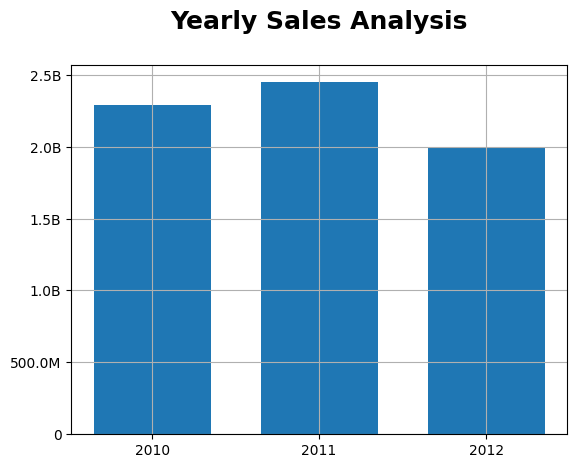

In [ ]:
data['Year'] = data['Date'].dt.year
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum().reset_index()

fig, ax = plt.subplots(1, 1)

plot = ax

def human_format(num):
    if num >= 1e9:
        return f'{num/1e9:.1f}B'
    elif num >= 1e6:
        return f'{num/1e6:.1f}M'
    elif num >= 1e3:
        return f'{num/1e3:.1f}K'
    else:
        return str(int(num))


plot.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: human_format(x)))

plot.set_xticks(yearly_sales['Year'])

bars = plot.bar(yearly_sales['Year'], 
         yearly_sales['Weekly_Sales'],
         width= 0.7)

plot.set_title('Yearly Sales Analysis\n', fontsize=18, fontweight='bold')
plt.grid(True)

plt.show()